In [1]:
import json
import os
import pandas as pd
import numpy as np
import prettytable as pt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import dates
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")


###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################


directory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
datadirectory=directory+"/data/yielddata.csv"


yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 

mdirectory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
mdatadirectory=mdirectory+"/data/marketdata.csv"

marketdata = pd.read_csv(mdatadirectory)
marketdata = marketdata.replace(np.nan, '', regex=True) 


/opt/homebrew/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fixedRateBondDefinition={}
fixedRateBondDefinition["issueDate"]="2015-03-15"
fixedRateBondDefinition["maturityDate"]="2026-06-04"
fixedRateBondDefinition["frequency"]="Semiannual"
fixedRateBondDefinition["coupon"]=0.085
fixedRateBondDefinition["calendar"]="Turkey"
fixedRateBondDefinition["currency"]="TRY"
fixedRateBondDefinition["dateGeneration"]="Backward"
fixedRateBondDefinition["dayCounter"]="Actual360"
fixedRateBondDefinition["businessDayConvention"]="ModifiedFollowing"
fixedRateBondDefinition["maturityDateConvention"]="ModifiedFollowing"
fixedRateBondDefinition["redemption"]=100
fixedRateBondDefinition["endOfMonth"]=True
fixedRateBondDefinition

{'issueDate': '2015-03-15',
 'maturityDate': '2026-06-04',
 'frequency': 'Semiannual',
 'coupon': 0.085,
 'calendar': 'Turkey',
 'currency': 'TRY',
 'dateGeneration': 'Backward',
 'dayCounter': 'Actual360',
 'businessDayConvention': 'ModifiedFollowing',
 'maturityDateConvention': 'ModifiedFollowing',
 'redemption': 100,
 'endOfMonth': True}

In [3]:
FRNDefinition={}
FRNDefinition["issueDate"]="2015-07-15"
FRNDefinition["maturityDate"]="2026-06-04"
FRNDefinition["frequency"]="Quarterly"
FRNDefinition["spread"]=0.0
FRNDefinition["calendar"]="Turkey"
FRNDefinition["currency"]="TRY"
FRNDefinition["dateGeneration"]="Backward"
FRNDefinition["dayCounter"]="Actual360"
FRNDefinition["businessDayConvention"]="ModifiedFollowing"
FRNDefinition["maturityDateConvention"]="ModifiedFollowing"
FRNDefinition["redemption"]=100
FRNDefinition["endOfMonth"]=True
FRNDefinition["fixingDate"]=["2020-12-02"]
FRNDefinition["fixingRate"]=[0.0012428641149285805]
FRNDefinition

{'issueDate': '2015-07-15',
 'maturityDate': '2026-06-04',
 'frequency': 'Quarterly',
 'spread': 0.0,
 'calendar': 'Turkey',
 'currency': 'TRY',
 'dateGeneration': 'Backward',
 'dayCounter': 'Actual360',
 'businessDayConvention': 'ModifiedFollowing',
 'maturityDateConvention': 'ModifiedFollowing',
 'redemption': 100,
 'endOfMonth': True,
 'fixingDate': ['2020-12-02'],
 'fixingRate': [0.0012428641149285805]}

In [4]:
fixedleg={}
fixedleg["payOrReceive"]="Receive"
fixedleg["coupon"]= 0.085
fixedleg["frequency"]="Semiannual"
fixedleg["calendar"]="Turkey"
fixedleg["dateGeneration"]="Backward"
fixedleg["dayCounter"]="Actual360"
fixedleg["businessDayConvention"]="ModifiedFollowing"
fixedleg["maturityDateConvention"]="ModifiedFollowing"
fixedleg["endOfMonth"]=True
fixedleg

{'payOrReceive': 'Receive',
 'coupon': 0.085,
 'frequency': 'Semiannual',
 'calendar': 'Turkey',
 'dateGeneration': 'Backward',
 'dayCounter': 'Actual360',
 'businessDayConvention': 'ModifiedFollowing',
 'maturityDateConvention': 'ModifiedFollowing',
 'endOfMonth': True}

In [5]:
floatingleg={}
floatingleg["frequency"]="Quarterly"
floatingleg["spread"]=0.0
floatingleg["calendar"]="Turkey"
floatingleg["dateGeneration"]="Backward"
floatingleg["dayCounter"]="Actual360"
floatingleg["businessDayConvention"]="ModifiedFollowing"
floatingleg["maturityDateConvention"]="ModifiedFollowing"
floatingleg["endOfMonth"]=True
floatingleg["fixingDate"]=["2020-12-02"]
floatingleg["fixingRate"]=[0.0012428641149285805]
floatingleg

{'frequency': 'Quarterly',
 'spread': 0.0,
 'calendar': 'Turkey',
 'dateGeneration': 'Backward',
 'dayCounter': 'Actual360',
 'businessDayConvention': 'ModifiedFollowing',
 'maturityDateConvention': 'ModifiedFollowing',
 'endOfMonth': True,
 'fixingDate': ['2020-12-02'],
 'fixingRate': [0.0012428641149285805]}

In [6]:
instruments={}
depo={}
irs={}

depo["businessDayConvention"]="Following"     # if it is null, default value is used
depo["dayCounter"]="Actual360"                # if it is null, default value is used

irs["businessDayConvention"]="Following"      # if it is null, default value is used 
irs["dayCounter"]="Actual360"                 # if it is null, default value is used 
irs["frequency"]="Semiannual"               

instruments["DEPO"]=depo
instruments["IRS"]=irs

instruments

{'DEPO': {'businessDayConvention': 'Following', 'dayCounter': 'Actual360'},
 'IRS': {'businessDayConvention': 'Following',
  'dayCounter': 'Actual360',
  'frequency': 'Semiannual'}}

In [7]:
# Fix parameters for building yield curve
yieldcurveconfig1={
      "name": "TRYZC",
      "settlementDays": 2,
      "intpMethod": "LINEAR",
      "currency": "TRY",
      "calendar": "Turkey",
      "dayCounter": "Actual360",
      "period": "6M",
      "instruments": instruments

    }
# Fix parameters for building yield curve
yieldcurveconfig2={
      "name": "USDZC",
      "settlementDays": 2,
      "intpMethod": "LINEAR",
      "currency": "USD",
      "calendar": "Turkey",
      "dayCounter": "Actual360",
      "period": "6M",
      "instruments": instruments

    }
yieldcurveconfig3={
      "name": "TRYZCX",
      "settlementDays": 2,
      "intpMethod": "LINEAR",
      "currency": "TRY",
      "calendar": "Turkey",
      "dayCounter": "Actual360",
      "period": "6M",
      "instruments": instruments

    }
yieldcurveconfig4={
      "name": "USDZCX",
      "settlementDays": 2,
      "intpMethod": "LINEAR",
      "currency": "USD",
      "calendar": "Turkey",
      "dayCounter": "Actual360",
      "period": "6M",
      "instruments": instruments

    }

In [8]:
riskdata = {
  "id": "PORTFOLIO1",
  "name": "PORTFOLIO 1",
  "method": "VaR",
  "forRisk": True,
  "valuationDate": "2021-01-28",
  "valuationCurrency": "TRY",
  "riskMethod": "DELTANORMAL",
  "horizon": 252,
  "confidenceInterval": 0.99,
  "returnType": None,
  "trend": False,
  "calendar": "Turkey",
  "timeBucket": ["0D","1D","1W","2W","3W","1M","2M","3M","6M","9M","1Y","2Y","3Y","4Y",
                "5Y","6Y","7Y","8Y","9Y","10Y","12Y","15Y","20Y","25Y","30Y","40Y","50Y"],
  "fillNa": "BACKWARD",
  "maxFillNaDays": 5,
  "tasks": [{
      "trade_id": "FRB1000",
      "calculation_type": "fixed_rate_bond",
      "notional": 1000000,
      "settlementDate": "2021-02-01",
      "buySell": "Sell",
      "discountCurve": "TRYZC",
      "fixedRateBondDefinition": fixedRateBondDefinition
    },
      {
      "trade_id": "FRN1000",
      "calculation_type": "floating_rate_bond",
      "notional": 1000000,
      "settlementDate": "2021-02-01",
      "buySell": "Buy",
      "discountCurve": "USDZC",
      "floatingBondDefinition": FRNDefinition
    },
      {
      "trade_id": "IRS1000",
      "calculation_type": "interest_rates_swap",
      "discountCurve": "TRYZCX",
      "floatingLegForecastCurve": "USDZCX",
      "settlementDate": "2021-02-01",
      "maturityDate": "2026-06-04",
      "startDate": "2021-02-01",
      "notional": 1000000,
      "currency": "TRY",
      "fixedLeg":fixedleg,
      "floatingLeg":floatingleg
    }
  ],
  "curves": [yieldcurveconfig1,yieldcurveconfig2,yieldcurveconfig3,yieldcurveconfig4],
  "yieldData": yielddata.to_dict('r'),
  "marketData":marketdata.to_dict('r'),
}

In [9]:
try:
    res = api.createTask(CalculationType.PORTFOLIO, riskdata, True)
    if(res["result"]):
      result=json.loads(res["result"])
    else:
      print(res["result"])
except RhoovaError as e:
    e.printPretty()

In [10]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['PV', result.get('pv')])
npvTable.add_row(['VAR', result.get('VaR')])
npvTable.add_row(['VAR/PV (%)', result.get('var/pv')])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)


+------------+-------------+
| Parameters |       Value |
+------------+-------------+
|         PV | -13716.6966 |
|        VAR |      0.8605 |
| VAR/PV (%) |      0.0063 |
+------------+-------------+


In [11]:
cashflowForVarP=result.get("cashflowForVar")
cashflowForVar1=pd.DataFrame(cashflowForVarP.get("TRYZC"))
cashflowForVar2=pd.DataFrame(cashflowForVarP.get("USDZC"))
cashflowForVar3=pd.DataFrame(cashflowForVarP.get("TRYZCX"))
cashflowForVar4=pd.DataFrame(cashflowForVarP.get("USDZCX"))
cashflowForVar=pd.concat([cashflowForVar1,cashflowForVar2,cashflowForVar3,cashflowForVar4])

In [12]:
portfolio=cashflowForVar[['fixingDate', 'accrualStart', 'accrualEnd', 'notional', 'currency',
       'leg', 'payOrReceive', 'instrument', 'rate', 'zeroRate','spread','termToMatByDay', 
        'termToMatByYear', 'cashflow', 'discountFactor','cashflowPv']]
portfolio

,fixingDate,accrualStart,accrualEnd,notional,currency,leg,payOrReceive,instrument,rate,zeroRate,spread,termToMatByDay,termToMatByYear,cashflow,discountFactor,cashflowPv
0,2020-12-02,2020-12-04,2021-06-04,1000000,TRY,Fixed,Sell,Fixed Rate Bond,0.085000,0.002171,0,123,0.341667,-4.297222e+04,0.999259,-4.294036e+04
1,2021-06-02,2021-06-04,2021-12-06,1000000,TRY,Fixed,Sell,Fixed Rate Bond,0.085000,0.002853,0,308,0.855556,-4.368056e+04,0.997562,-4.357405e+04
2,2021-12-02,2021-12-06,2022-06-06,1000000,TRY,Fixed,Sell,Fixed Rate Bond,0.085000,0.002730,0,490,1.361111,-4.297222e+04,0.996291,-4.281284e+04
3,2022-06-02,2022-06-06,2022-12-05,1000000,TRY,Fixed,Sell,Fixed Rate Bond,0.085000,0.002170,0,672,1.866667,-4.297222e+04,0.995958,-4.279854e+04
4,2022-12-01,2022-12-05,2023-06-05,1000000,TRY,Fixed,Sell,Fixed Rate Bond,0.085000,0.002200,0,854,2.372222,-4.297222e+04,0.994794,-4.274851e+04
5,2023-06-01,2023-06-05,2023-12-04,1000000,TRY,Fixed,Sell,Fixed Rate Bond,0.085000,0.002507,0,1036,2.877778,-4.297222e+04,0.992810,-4.266326e+04
6,2023-11-30,2023-12-04,2024-06-04,1000000,TRY,Fixed,Sell,Fixed Rate Bond,0.085000,0.003005,0,1219,3.386111,-4.320833e+04,0.989875,-4.277085e+04
7,2024-05-31,2024-06-04,2024-12-04,1000000,TRY,Fixed,Sell,Fixed Rate Bond,0.085000,0.003593,0,1402,3.894444,-4.320833e+04,0.986104,-4.260791e+04
8,2024-12-02,2024-12-04,2025-06-04,1000000,TRY,Fixed,Sell,Fixed Rate Bond,0.085000,0.004209,0,1584,4.400000,-4.297222e+04,0.981650,-4.218367e+04
9,2025-06-02,2025-06-04,2025-12-04,1000000,TRY,Fixed,Sell,Fixed Rate Bond,0.085000,0.004845,0,1767,4.908333,-4.320833e+04,0.976501,-4.219300e+04


In [13]:
cashflowForVar[['binLTimeToMatByDay', 'binRTimeToMatByDay', 'binL','binR', 'stDevL', 'stDevR', 'correl',
                'vertixL', 'vertixR','splitFactor', 'yieldsL', 'yieldsR', 'yields','stdev', 'duration',
                'cashflows0', 'cashflowsL', 'cashflowsR', 'presentValue', 'splitPv','splitDuration']]

,binLTimeToMatByDay,binRTimeToMatByDay,binL,binR,stDevL,stDevR,correl,vertixL,vertixR,splitFactor,...,yieldsR,yields,stdev,duration,cashflows0,cashflowsL,cashflowsR,presentValue,splitPv,splitDuration
0,90,181,3M,6M,0.045911,0.034505,0.596626,TRYZC3M,TRYZC6M,0.476982,...,0.002275,0.002173,0.041775,1.467128e+04,-78.131524,-27698.975424,-1.519549e+04,-4.294034e+04,-4.294034e+04,1.467128e+04
1,273,365,9M,1Y,0.029362,0.029077,0.931134,TRYZC9M,TRYZC1Y,0.092161,...,0.003115,0.002853,0.029253,3.728002e+04,-5662.739223,-4539.926347,-3.348624e+04,-4.357405e+04,-4.357405e+04,3.728002e+04
2,365,732,1Y,2Y,0.029077,0.051946,0.201254,TRYZC1Y,TRYZC2Y,0.358435,...,0.001991,0.002732,0.036866,5.827286e+04,-3774.944327,-20666.104069,-1.851142e+04,-4.281271e+04,-4.281271e+04,5.827286e+04
3,365,732,1Y,2Y,0.029077,0.051946,0.201254,TRYZC1Y,TRYZC2Y,0.082352,...,0.001991,0.002175,0.048207,7.988985e+04,-155.905571,-6509.514676,-3.629949e+04,-4.279813e+04,-4.279813e+04,7.988985e+04
4,732,1096,2Y,3Y,0.051946,0.057739,0.881757,TRYZC2Y,TRYZC3Y,0.396759,...,0.002607,0.002197,0.053888,1.014097e+05,-2794.628500,-19922.301863,-2.027226e+04,-4.274880e+04,-4.274880e+04,1.014097e+05
5,732,1096,2Y,3Y,0.051946,0.057739,0.881757,TRYZC2Y,TRYZC3Y,0.083058,...,0.002607,0.002505,0.056784,1.227761e+05,-622.457694,-5049.261800,-3.730678e+04,-4.266350e+04,-4.266350e+04,1.227761e+05
6,1096,1461,3Y,4Y,0.057739,0.065762,0.907809,TRYZC3Y,TRYZC4Y,0.484837,...,0.003789,0.003005,0.060442,1.448268e+05,-1326.551181,-23268.958605,-1.864402e+04,-4.277085e+04,-4.277085e+04,1.448268e+05
7,1096,1461,3Y,4Y,0.057739,0.065762,0.907809,TRYZC3Y,TRYZC4Y,0.100628,...,0.003789,0.003598,0.064465,1.659310e+05,-395.689049,-5533.214795,-3.729174e+04,-4.260710e+04,-4.260710e+04,1.659310e+05
8,1461,1826,4Y,5Y,0.065762,0.062450,0.940251,TRYZC4Y,TRYZC5Y,0.672930,...,0.005053,0.004215,0.064646,1.856034e+05,512.684385,-31210.560971,-1.227235e+04,-4.218260e+04,-4.218260e+04,1.856034e+05
9,1461,1826,4Y,5Y,0.065762,0.062450,0.940251,TRYZC4Y,TRYZC5Y,0.296990,...,0.005053,0.004849,0.062986,2.070932e+05,1629.664354,-15369.266103,-2.943258e+04,-4.219216e+04,-4.219216e+04,2.070932e+05


In [14]:
mappedcf=cashflowForVar[['instrument','termToMatByDay','cashflow',"binLTimeToMatByDay","binRTimeToMatByDay",'cashflows0', 'cashflowsL', 'cashflowsR', 'presentValue', 'splitPv',"duration",'splitDuration']]
mappedcf

,instrument,termToMatByDay,cashflow,binLTimeToMatByDay,binRTimeToMatByDay,cashflows0,cashflowsL,cashflowsR,presentValue,splitPv,duration,splitDuration
0,Fixed Rate Bond,123,-4.297222e+04,90,181,-78.131524,-27698.975424,-1.519549e+04,-4.294034e+04,-4.294034e+04,1.467128e+04,1.467128e+04
1,Fixed Rate Bond,308,-4.368056e+04,273,365,-5662.739223,-4539.926347,-3.348624e+04,-4.357405e+04,-4.357405e+04,3.728002e+04,3.728002e+04
2,Fixed Rate Bond,490,-4.297222e+04,365,732,-3774.944327,-20666.104069,-1.851142e+04,-4.281271e+04,-4.281271e+04,5.827286e+04,5.827286e+04
3,Fixed Rate Bond,672,-4.297222e+04,365,732,-155.905571,-6509.514676,-3.629949e+04,-4.279813e+04,-4.279813e+04,7.988985e+04,7.988985e+04
4,Fixed Rate Bond,854,-4.297222e+04,732,1096,-2794.628500,-19922.301863,-2.027226e+04,-4.274880e+04,-4.274880e+04,1.014097e+05,1.014097e+05
5,Fixed Rate Bond,1036,-4.297222e+04,732,1096,-622.457694,-5049.261800,-3.730678e+04,-4.266350e+04,-4.266350e+04,1.227761e+05,1.227761e+05
6,Fixed Rate Bond,1219,-4.320833e+04,1096,1461,-1326.551181,-23268.958605,-1.864402e+04,-4.277085e+04,-4.277085e+04,1.448268e+05,1.448268e+05
7,Fixed Rate Bond,1402,-4.320833e+04,1096,1461,-395.689049,-5533.214795,-3.729174e+04,-4.260710e+04,-4.260710e+04,1.659310e+05,1.659310e+05
8,Fixed Rate Bond,1584,-4.297222e+04,1461,1826,512.684385,-31210.560971,-1.227235e+04,-4.218260e+04,-4.218260e+04,1.856034e+05,1.856034e+05
9,Fixed Rate Bond,1767,-4.320833e+04,1461,1826,1629.664354,-15369.266103,-2.943258e+04,-4.219216e+04,-4.219216e+04,2.070932e+05,2.070932e+05


In [15]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['PV', result.get('pv')])
npvTable.add_row(['Split PV', cashflowForVar["splitPv"].sum()])
npvTable.add_row(['Errror', 100*(result.get('pv')-cashflowForVar["splitPv"].sum())/result.get('pv')])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)
print("PV is preserved")

+------------+-------------+
| Parameters |       Value |
+------------+-------------+
|         PV | -13716.6966 |
|   Split PV | -13716.6876 |
|     Errror |      0.0001 |
+------------+-------------+
PV is preserved


In [16]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['Duration', cashflowForVar["duration"].sum()])
npvTable.add_row(['Split Duration', cashflowForVar["splitDuration"].sum()])
npvTable.add_row(['Errror', 100*(cashflowForVar["duration"].sum()-cashflowForVar["splitDuration"].sum())/cashflowForVar["duration"].sum()])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)
print("Duration is preserved")

+----------------+-----------+
|     Parameters |     Value |
+----------------+-----------+
|       Duration | 4738.5485 |
| Split Duration | 4738.5485 |
|         Errror |   -0.0000 |
+----------------+-----------+
Duration is preserved


In [17]:
original_cf=pd.DataFrame(cashflowForVar['cashflow'].values,index=cashflowForVar['termToMatByDay'].tolist()).reset_index()
original_cf.columns=["bin","cashflows"]
original_cf=original_cf.groupby('bin').sum()
original_cf=original_cf.reset_index()


In [18]:
leftcf=cashflowForVar[["binLTimeToMatByDay","cashflowsL"]]
leftcf.columns=["bin","cashflows"]
rightcf=cashflowForVar[["binRTimeToMatByDay","cashflowsR"]]
rightcf.columns=["bin","cashflows"]
mappedcf=pd.concat([leftcf,rightcf])
mappedcf=mappedcf.groupby('bin').sum()
mappedcf=mappedcf.reset_index()


In [19]:
mappedcf0=cashflowForVar["cashflows0"].sum()
mappedcf["Cashflows"]="mapped cashflows"
original_cf["Cashflows"]="original cashflows"
cf=pd.concat([original_cf,mappedcf])
cf.loc[len(cf.index)] = [0,mappedcf0,"mapped cashflows0"] 
cf

,bin,cashflows,Cashflows
0,31,203.552527,original cashflows
1,123,-13930.555556,original cashflows
2,308,0.000000,original cashflows
3,490,0.000000,original cashflows
4,672,0.000000,original cashflows
5,854,0.000000,original cashflows
6,1036,0.000000,original cashflows
7,1219,0.000000,original cashflows
8,1402,0.000000,original cashflows
9,1584,0.000000,original cashflows


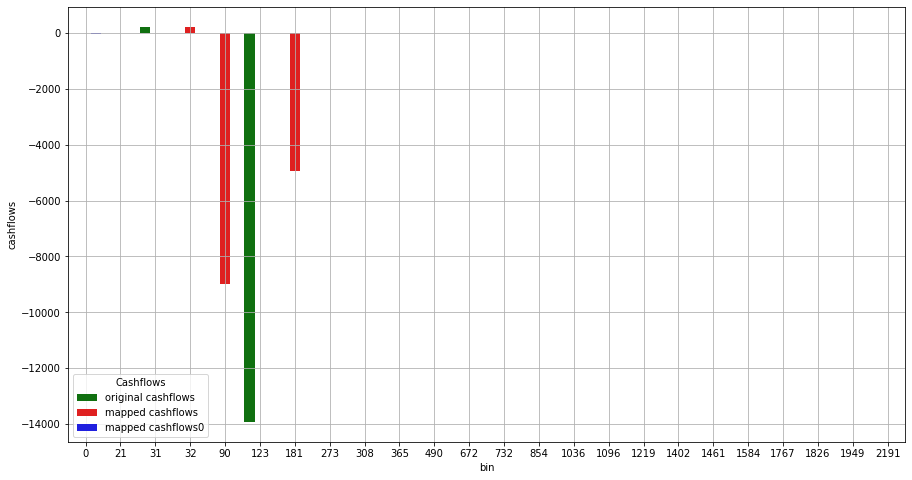

In [20]:
plt.figure(figsize=(15,8))
ax=sns.barplot(x="bin",y="cashflows",data=cf,hue="Cashflows",width=0.9,palette=["green", "red","blue"])
ax.grid()

In [21]:
portfoliocorr=result.get("riskFactorsCorr")
pd.DataFrame(portfoliocorr)

,TRYZC0D,TRYZC1D,TRYZC1W,TRYZC2W,TRYZC3W,TRYZC1M,TRYZC2M,TRYZC3M,TRYZC6M,TRYZC9M,...,USDZCX8Y,USDZCX9Y,USDZCX10Y,USDZCX12Y,USDZCX15Y,USDZCX20Y,USDZCX25Y,USDZCX30Y,USDZCX40Y,USDZCX50Y
TRYZC0D,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.691755,0.563094,0.503333,0.543372,...,0.195936,0.204695,0.255008,0.261205,0.238894,0.246247,0.234173,0.290357,0.267326,0.234319
TRYZC1D,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.691755,0.563094,0.503333,0.543372,...,0.195936,0.204695,0.255008,0.261205,0.238894,0.246247,0.234173,0.290357,0.267326,0.234319
TRYZC1W,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.691755,0.563094,0.503333,0.543372,...,0.195936,0.204695,0.255008,0.261205,0.238894,0.246247,0.234173,0.290357,0.267326,0.234319
TRYZC2W,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.691755,0.563094,0.503333,0.543372,...,0.195936,0.204695,0.255008,0.261205,0.238894,0.246247,0.234173,0.290357,0.267326,0.234319
TRYZC3W,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.691755,0.563094,0.503333,0.543372,...,0.195936,0.204695,0.255008,0.261205,0.238894,0.246247,0.234173,0.290357,0.267326,0.234319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USDZCX20Y,0.246247,0.246247,0.246247,0.246247,0.246247,0.246247,0.259471,0.170653,0.228275,0.250858,...,0.908718,0.930201,0.926256,0.951269,0.984602,1.000000,0.972363,0.923364,0.588124,0.408426
USDZCX25Y,0.234173,0.234173,0.234173,0.234173,0.234173,0.234173,0.247552,0.167664,0.219192,0.241200,...,0.873315,0.906226,0.887277,0.922125,0.968795,0.972363,1.000000,0.890403,0.494820,0.301571
USDZCX30Y,0.290357,0.290357,0.290357,0.290357,0.290357,0.290357,0.291342,0.193558,0.268292,0.289878,...,0.876192,0.893217,0.948052,0.912240,0.910460,0.923364,0.890403,1.000000,0.835505,0.700664
USDZCX40Y,0.267326,0.267326,0.267326,0.267326,0.267326,0.267326,0.253118,0.170175,0.250160,0.262963,...,0.617567,0.611406,0.737990,0.627959,0.569822,0.588124,0.494820,0.835505,1.000000,0.977227


In [23]:
list(pd.DataFrame(portfoliocorr).columns)

['TRYZC0D',
 'TRYZC1D',
 'TRYZC1W',
 'TRYZC2W',
 'TRYZC3W',
 'TRYZC1M',
 'TRYZC2M',
 'TRYZC3M',
 'TRYZC6M',
 'TRYZC9M',
 'TRYZC1Y',
 'TRYZC2Y',
 'TRYZC3Y',
 'TRYZC4Y',
 'TRYZC5Y',
 'TRYZC6Y',
 'TRYZC7Y',
 'TRYZC8Y',
 'TRYZC9Y',
 'TRYZC10Y',
 'TRYZC12Y',
 'TRYZC15Y',
 'TRYZC20Y',
 'TRYZC25Y',
 'TRYZC30Y',
 'TRYZC40Y',
 'TRYZC50Y',
 'TRYZCX0D',
 'TRYZCX1D',
 'TRYZCX1W',
 'TRYZCX2W',
 'TRYZCX3W',
 'TRYZCX1M',
 'TRYZCX2M',
 'TRYZCX3M',
 'TRYZCX6M',
 'TRYZCX9M',
 'TRYZCX1Y',
 'TRYZCX2Y',
 'TRYZCX3Y',
 'TRYZCX4Y',
 'TRYZCX5Y',
 'TRYZCX6Y',
 'TRYZCX7Y',
 'TRYZCX8Y',
 'TRYZCX9Y',
 'TRYZCX10Y',
 'TRYZCX12Y',
 'TRYZCX15Y',
 'TRYZCX20Y',
 'TRYZCX25Y',
 'TRYZCX30Y',
 'TRYZCX40Y',
 'TRYZCX50Y',
 'USDZC0D',
 'USDZC1D',
 'USDZC1W',
 'USDZC2W',
 'USDZC3W',
 'USDZC1M',
 'USDZC2M',
 'USDZC3M',
 'USDZC6M',
 'USDZC9M',
 'USDZC1Y',
 'USDZC2Y',
 'USDZC3Y',
 'USDZC4Y',
 'USDZC5Y',
 'USDZC6Y',
 'USDZC7Y',
 'USDZC8Y',
 'USDZC9Y',
 'USDZC10Y',
 'USDZC12Y',
 'USDZC15Y',
 'USDZC20Y',
 'USDZC25Y',
 'USDZC30Y',
 'U